In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,third_sol_amount_ml,...,x6_zinc undecylenate,x7_None,x7_copper bromide,x7_oleic acid,x7_water,x7_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 81
0,0,0,0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,-0.096002,...,0,1,0,0,0,0,2.4300,480.000000,539.000000,59.000000
1,1,1,1,1,0.195883,0.280681,-0.439228,-0.658075,-0.370637,-0.096002,...,0,1,0,0,0,0,2.6100,610.000000,653.000000,43.000000
2,2,2,2,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,1,0,0,0,0,2.8435,560.000000,595.000000,35.000000
3,3,3,3,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,1,0,0,0,0,3.0560,590.000000,635.000000,45.000000
4,4,5,5,5,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,-0.096002,...,0,1,0,0,0,0,2.7800,500.827586,520.000000,19.172414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,214,214,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.096002,...,0,1,0,0,0,0,4.0000,585.000000,630.000000,45.000000
212,212,215,215,215,7.590031,7.504453,-0.439228,5.524499,-0.370637,-0.096002,...,0,1,0,0,0,0,3.0550,465.000000,550.000000,85.000000
213,213,216,216,216,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,1,0,0,0,0,2.0800,465.000000,584.833333,119.833333
214,214,217,217,217,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,1,0,0,0,0,2.7900,495.000000,594.833333,99.833333


In [3]:
# Input for ML models

input_col = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 'x5_None', 'x5_trioctylphosphine',
       'x6_None', 'x6_acetic acid', 'x6_superhydride',
       'x6_tetrabutylammonium myristate', 'x6_zinc acetate', 'x6_zinc bromide',
       'x6_zinc chloride', 'x6_zinc iodide', 'x6_zinc octanoate',
       'x6_zinc oleate', 'x6_zinc stearate', 'x6_zinc undecylenate', 'x7_None',
       'x7_copper bromide', 'x7_oleic acid', 'x7_water', 'x7_zinc iodide']

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']

#Splitting dataset

X = df[input_col]

Y_d = df[diameter]
Y_e = df[emission]
Y_a = df[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X, Y_a, test_size=0.15, random_state=45, shuffle=True)

## D - Optimizing diameter model


### 1D. Extra Trees

In [4]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [10:56<00:00, 27.33s/it]

0.25352813852813844 7 23 25


In [4]:
ET_regr = ExtraTreesRegressor(n_estimators=7, 
                                            max_features=23,
                                            random_state=25)
            
ET_regr.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, ET_Y_pred_d)
print(r2)

0.8510602552281111


### 2D. Decision Tree 

In [5]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 70, 2):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train_d, np.ravel(Y_train_d))
            DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, DT_Y_pred_d)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:04<00:00,  8.43s/it]

0.2647947330447331 13 22 26


In [5]:
DT_regr = DecisionTreeRegressor(max_depth=13,
                                max_features=22,
                                random_state=26)
            
DT_regr.fit(X_train_d, np.ravel(Y_train_d))
DT_Y_pred_d = pd.DataFrame(DT_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, DT_Y_pred_d)
print(r2)

0.8398252098496155


### 3D. Random Forest

In [7]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 27)):
    for j in range(1, 27):
        for k in range(2, 46, 1):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train_d, np.ravel(Y_train_d))
            RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, RF_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 26/26 [15:29<00:00, 35.74s/it]

0.2726379009458553 12 8 27


In [6]:
RF_regr = RandomForestRegressor(max_depth=11, 
                                            n_estimators=5, 
                                            max_features=41,
                                            random_state=45)
RF_regr.fit(X_train_d, np.ravel(Y_train_d))
RF_Y_pred_d = pd.DataFrame(RF_regr.predict(X_test_d))
r2 = r2_score(Y_test_d, RF_Y_pred_d)
print(r2)

0.6414366036274828


### 4D. K Neighbors

In [8]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_d = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_d, np.ravel(Y_train_d))

        KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

        mae = mean_absolute_error(Y_test_d, KNN_Y_pred_d)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:27<00:00,  1.41it/s]

0.3717424242424242 2 1


In [7]:
KNN_reg_d = KNeighborsRegressor(n_neighbors=3, 
                                      p=3).fit(X_train_d, np.ravel(Y_train_d))

KNN_Y_pred_d = KNN_reg_d.predict(X_test_d)

r2 = r2_score(Y_test_d, KNN_Y_pred_d)
print(r2)

0.5290612322889579


In [8]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_d, np.ravel(Y_train_d))
            
GB_Y_pred_d = GB_regr.predict(X_test_d)
            
GB_mae = mean_absolute_error(Y_test_d, GB_Y_pred_d)

r2=r2_score(Y_test_d, GB_Y_pred_d)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 0.285 R2=  0.8476456177573202


In [9]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                                      n_estimators=6,
                                      random_state=50)
B_regr.fit(X_train_d, np.ravel(Y_train_d))

B_Y_pred = B_regr.predict(X_test_d)
           
B_mae = mean_absolute_error(Y_test_d, B_Y_pred)
r2 = r2_score(Y_test_d, B_Y_pred)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 0.375 r2 =  0.7331359609290752


### Saving Decision Tree model

In [18]:
ET_regr_d = ExtraTreesRegressor(n_estimators=7, 
                                            max_features=23,
                                            random_state=25)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = pd.DataFrame(ET_regr_d.predict(X_test_d))
joblib.dump(ET_regr_d, "./model_SO_diameter_ExtraTrees.joblib")

['./model_SO_diameter_ExtraTrees.joblib']

## E - Optimizing emission model


### 1E. Extra Trees

In [9]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr_e = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [11:05<00:00, 27.72s/it]

13.816498316161624 3 11 32


In [10]:
ET_regr_e = ExtraTreesRegressor(n_estimators=3,
                                            max_features=11,
                                            random_state=32)
            
ET_regr_e.fit(X_train_e, np.ravel(Y_train_e))
ET_Y_pred_e = pd.DataFrame(ET_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, ET_Y_pred_e)
print(r2)

0.7762708630463275


### 2E. Decision Trees

In [10]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 60, 2):
            
            DT_regr_e = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, DT_Y_pred_e)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [03:02<00:00,  6.30s/it]

15.067224885039863 12 20 32


In [12]:
DT_regr_e = DecisionTreeRegressor(max_depth=12,
                                max_features=20,
                                random_state=32)
            
DT_regr_e.fit(X_train_e, np.ravel(Y_train_e))
DT_Y_pred_e = pd.DataFrame(DT_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, DT_Y_pred_e)
print(r2)

0.7443913658530097


### 3E. Random Forest

In [11]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 28)):
    for j in range(1, 28):
        for k in range(2, 46, 1):
            RF_regr_e = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
            RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, RF_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 27/27 [15:59<00:00, 35.55s/it]

16.189015159242413 23 4 37


In [13]:
RF_regr_e = RandomForestRegressor(max_depth=22, 
                                            n_estimators=5, 
                                            max_features=28,
                                            random_state=45)
RF_regr_e.fit(X_train_e, np.ravel(Y_train_e))
RF_Y_pred_e = pd.DataFrame(RF_regr_e.predict(X_test_e))

r2 = r2_score(Y_test_e, RF_Y_pred_e)

print(r2)

0.5785926652339284


### 4E. K Neighbors

In [12]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_e = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_e, np.ravel(Y_train_e))

        KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

        mae = mean_absolute_error(Y_test_e, KNN_Y_pred_e)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:27<00:00,  1.41it/s]

20.035353539393935 1 1


In [14]:
KNN_reg_e = KNeighborsRegressor(n_neighbors=1, 
                                      p=1).fit(X_train_e, np.ravel(Y_train_e))

KNN_Y_pred_e = KNN_reg_e.predict(X_test_e)

r2 = r2_score(Y_test_e, KNN_Y_pred_e)
print(r2)

0.569705893576764


In [15]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                                      n_estimators=6,
                                      random_state=50)
B_regr.fit(X_train_e, np.ravel(Y_train_e))

B_Y_pred_e = B_regr.predict(X_test_e)
           
B_mae = mean_absolute_error(Y_test_e, B_Y_pred_e)
r2 = r2_score(Y_test_e, B_Y_pred_e)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 23.788 r2 =  0.41423331350675663


In [16]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_e, np.ravel(Y_train_e))
            
GB_Y_pred_e = GB_regr.predict(X_test_e)
            
GB_mae = mean_absolute_error(Y_test_e, GB_Y_pred_e)

r2=r2_score(Y_test_e, GB_Y_pred_e)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 17.175 R2=  0.6864441439999136


### Saving Extra Trees model

In [19]:
ET_regr_e = ExtraTreesRegressor(n_estimators=3,
                            max_features=11,     
                            random_state=32).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

joblib.dump(ET_regr_e, "./model_SO_emission_ExtraTrees.joblib")

['./model_SO_emission_ExtraTrees.joblib']

## A - Optimizing absorption model


### 1A: Extra Trees

In [13]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(2, 50, 1):
            ET_regr_a = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [22:20<00:00, 46.22s/it]

17.33490073030303 2 25 38


In [18]:
ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                            max_features=25,
                                            random_state=38)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

r2 = r2_score(Y_test_a, ET_Y_pred_a)
r2

0.8452141469146167

### 2A. Decision Trees


In [14]:
# This is a grid search for three parameters in the Decision Trees algorithm. 

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 30)):
    for j in range(1, 30):
        for k in range(4, 80, 2):
            
            DT_regr_a = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            DT_Y_pred_a = pd.DataFrame(DT_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, DT_Y_pred_a)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 29/29 [04:30<00:00,  9.32s/it]

19.407001046081504 14 13 30


In [20]:
DT_regr_a = DecisionTreeRegressor(max_depth=14,
                                max_features=13,
                                random_state=30).fit(X_train_a, np.ravel(Y_train_a))
                  
DT_Y_pred_a = DT_regr_a.predict(X_test_a)


DT_r2_a = r2_score(Y_test_a, DT_Y_pred_a)
DT_MSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a)
DT_RMSE_a = mean_squared_error(Y_test_a, DT_Y_pred_a, squared=False)
DT_MAE_a = mean_absolute_error(Y_test_a, DT_Y_pred_a)
print('diameter:', 'r2:', DT_r2_a, '; MSE:', DT_MSE_a, '; RMSE:', DT_RMSE_a, '; MAE:', DT_MAE_a)

diameter: r2: 0.7515796311357988 ; MSE: 806.0897650794798 ; RMSE: 28.391720009176616 ; MAE: 19.407001046081504


### 3A. Random Forest

In [15]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 24)):
    for j in range(1, 24):
        for k in range(2, 35, 1):
            RF_regr_a = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
            RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, RF_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 23/23 [07:25<00:00, 19.36s/it]

23.743730406439393 21 8 9


In [21]:
RF_regr_a = RandomForestRegressor(max_depth=21, 
                                            n_estimators=8, 
                                            max_features=9,
                                            random_state=45)
RF_regr_a.fit(X_train_a, np.ravel(Y_train_a))
RF_Y_pred_a = pd.DataFrame(RF_regr_a.predict(X_test_a))

r2 = r2_score(Y_test_a, RF_Y_pred_a)
r2

0.7170321801159669

### 4A. K Neighbors

In [16]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg_a = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train_a, np.ravel(Y_train_a))

        KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

        mae = mean_absolute_error(Y_test_a, KNN_Y_pred_a)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:26<00:00,  1.49it/s]

26.832810866666666 1 1


In [23]:
KNN_reg_a = KNeighborsRegressor(n_neighbors=1, 
                                      p=1).fit(X_train_a, np.ravel(Y_train_a))

KNN_Y_pred_a = KNN_reg_a.predict(X_test_a)

r2 = r2_score(Y_test_a, KNN_Y_pred_a)
r2

0.6261972348915189

In [24]:
GB_regr = GradientBoostingRegressor(n_estimators=380, max_depth=4, learning_rate=0.18, random_state=6)

            
GB_regr.fit(X_train_e, np.ravel(Y_train_a))
            
GB_Y_pred_a = GB_regr.predict(X_test_a)
            
GB_mae = mean_absolute_error(Y_test_a, GB_Y_pred_a)

r2=r2_score(Y_test_a, GB_Y_pred_a)
print("Mean absolute error =", round(GB_mae,3), "R2= " , r2)

Mean absolute error = 21.391 R2=  0.7629509034844698


In [25]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=22),
                                      n_estimators=10,
                                      random_state=20)
B_regr.fit(X_train_a, np.ravel(Y_train_a))

B_Y_pred_a = B_regr.predict(X_test_a)
           
B_mae = mean_absolute_error(Y_test_a, B_Y_pred_a)
r2 = r2_score(Y_test_a, B_Y_pred_a)
           
print("Mean absolute error =", round(B_mae,3), "r2 = ", r2)

Mean absolute error = 31.808 r2 =  0.44817935921395247


### Saving model

In [20]:
ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                max_features=25,
                                random_state=38)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr_a.predict(X_test_a))

joblib.dump(ET_regr_a, "./model_SO_abs_ExtraTrees.joblib")

['./model_SO_abs_ExtraTrees.joblib']

## Analyzing

In [23]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=7, 
                                            max_features=23,
                                            random_state=25)
            
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=3,
                            max_features=11,     
                            random_state=32).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=2, 
                                max_features=25,
                                random_state=38)
            
ET_regr_a.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.85106                0.253528              0.146496                   0.382748
Absorption  0.845214              17.3349              502.259                     22.4111
Emission    0.776271              13.8165              417.118                     20.4235


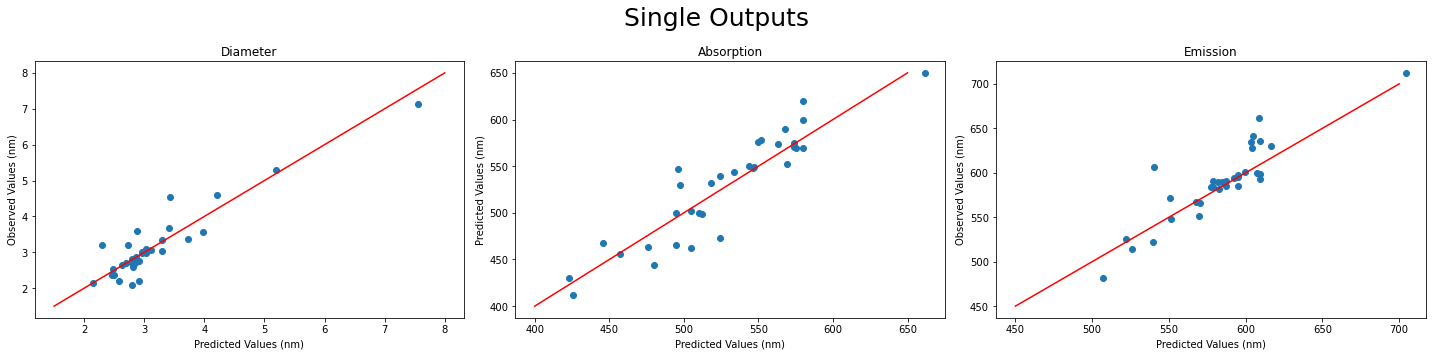

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(ET_Y_pred_d, Y_test_d, 'o')
ax1.plot([1.5,8],[1.5,8], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')

ax2.plot(ET_Y_pred_a, Y_test_a, 'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Predicted Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(ET_Y_pred_e, Y_test_e, 'o')
ax3.plot([450,700],[450,700], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Predicted Values (nm)', ylabel='Observed Values (nm)')


fig.tight_layout()

## Feature importance

### For diameter prediction

In [26]:
importance_dict_d = dict()
for i in range(0,71):
    importance_dict_d[input_col[i]] = ET_regr_d.feature_importances_[i]

sorted_importance_d = sorted(importance_dict_d.items(), key=lambda x: x[1], reverse=True)

sorted_importance_d


[('x0_indium trifluoroacetate', 0.21528425744956453),
 ('x6_zinc iodide', 0.18493071592379612),
 ('temp_c', 0.08896870998392434),
 ('time_min', 0.07815387843532047),
 ('x0_indium acetate', 0.0565774192057567),
 ('x4_dioctylamine', 0.04869326274855771),
 ('x2_myristic acid', 0.033068043232619235),
 ('in_amount_mmol', 0.030831633158011733),
 ('ligand_amount_mmol', 0.022852864821556955),
 ('x0_indium oxalate', 0.01837307878403434),
 ('x4_trioctylphosphine oxide', 0.017027477602441807),
 ('x1_phosphine gas', 0.01465153253676499),
 ('x1_tris(trimethylsilyl)phosphine', 0.013870689304058825),
 ('second_sol_amount_ml', 0.01365382296381531),
 ('x3_4-ethylpyridine', 0.012950462616433522),
 ('total_volume_ml', 0.012708901820640705),
 ('x7_None', 0.012285050280609252),
 ('x3_trioctylamine', 0.01137865026833267),
 ('p_amount_mmol', 0.011253097970357208),
 ('x1_tris(dimethylamino)phosphine', 0.01112483213538244),
 ('first_sol_amount_ml', 0.010276973964595369),
 ('x3_octadecene', 0.009380457766012502

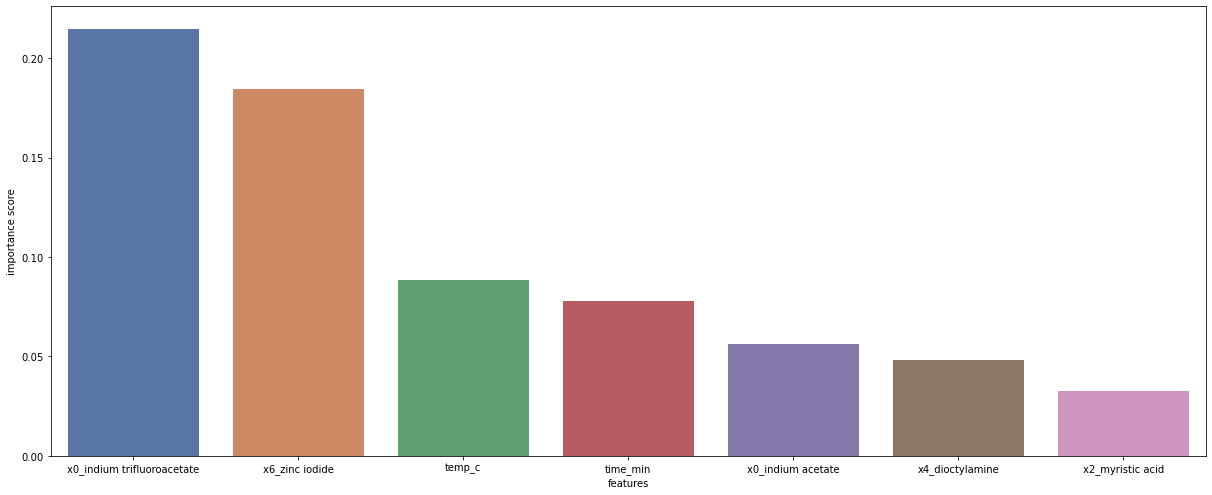

In [27]:
top7_d = DataFrame(sorted_importance_d[0:7], columns=['features', 'importance score'])

others_d = DataFrame(sorted_importance_d[7:], columns=['features', 'importance score'])


import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_d)

### Emission prediction

In [28]:
importance_dict_e = dict()
for i in range(0,71):
    importance_dict_e[input_col[i]] = ET_regr_e.feature_importances_[i]

sorted_importance_e = sorted(importance_dict_e.items(), key=lambda x: x[1], reverse=True)


sorted_importance_e


[('temp_c', 0.1381318399699285),
 ('time_min', 0.13513280627453583),
 ('x6_None', 0.11259375268043188),
 ('x0_indium oxalate', 0.06655467552207073),
 ('x3_trioctylphosphine', 0.06194539717952609),
 ('x6_zinc iodide', 0.04765552784137164),
 ('ligand_amount_mmol', 0.02698400407663447),
 ('x7_None', 0.026840142851611473),
 ('x6_zinc oleate', 0.025143812564440635),
 ('total_volume_ml', 0.02353699914005285),
 ('x1_phosphine gas', 0.021720228374606788),
 ('first_sol_amount_ml', 0.021441984839884458),
 ('in_amount_mmol', 0.019062716396633986),
 ('x4_dioctylamine', 0.01804460168636847),
 ('x2_myristic acid', 0.01766496592977477),
 ('x6_zinc undecylenate', 0.016862720165396222),
 ('x6_zinc bromide', 0.015487039208121113),
 ('other_1_amount_mmol', 0.015297615208120445),
 ('second_sol_amount_ml', 0.014127745377444963),
 ('x0_indium iodide', 0.01412334757276962),
 ('x6_zinc chloride', 0.013981043630301325),
 ('p_amount_mmol', 0.013655557851386503),
 ('x1_tris(trimethylsilyl)phosphine', 0.011057275

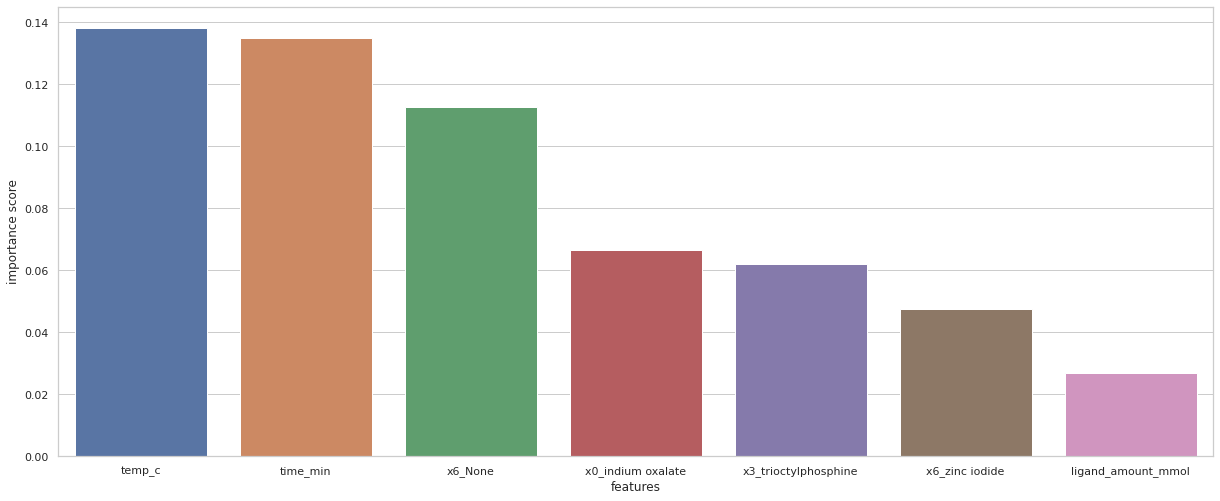

In [29]:
top7_e = DataFrame(sorted_importance_e[0:7], columns=['features', 'importance score'])

others_e = DataFrame(sorted_importance_e[7:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_e)

### Absorption prediction

In [30]:
importance_dict_a = dict()
for i in range(0,71):
    importance_dict_a[input_col[i]] = ET_regr_a.feature_importances_[i]

sorted_importance_a = sorted(importance_dict_a.items(), key=lambda x: x[1], reverse=True)

sorted_importance_a

[('time_min', 0.21393209196076224),
 ('temp_c', 0.18885559926127757),
 ('x6_None', 0.054992848634844396),
 ('ligand_amount_mmol', 0.05079442540439311),
 ('in_amount_mmol', 0.044028674354178274),
 ('first_sol_amount_ml', 0.04163360172443829),
 ('x7_None', 0.04125108238656659),
 ('x6_zinc iodide', 0.037729528631834125),
 ('x6_zinc oleate', 0.029516331725826093),
 ('x1_phosphine gas', 0.028190799140595947),
 ('x6_zinc chloride', 0.028084215966872605),
 ('x4_None', 0.02315435994505959),
 ('x2_dodecanethiol', 0.02173899768503565),
 ('total_volume_ml', 0.017957944371330428),
 ('p_amount_mmol', 0.016493056756558405),
 ('other_1_amount_mmol', 0.015767751485643737),
 ('other_2_amount_mmol', 0.01261585190014275),
 ('x1_tris(trimethylsilyl)phosphine', 0.011124473282994056),
 ('x6_zinc undecylenate', 0.010877495690007039),
 ('x3_oleylamine', 0.008003795988224698),
 ('second_sol_amount_ml', 0.007891937620688056),
 ('x3_dimethylformamide', 0.007805127439927846),
 ('x0_indium iodide', 0.0075334244070

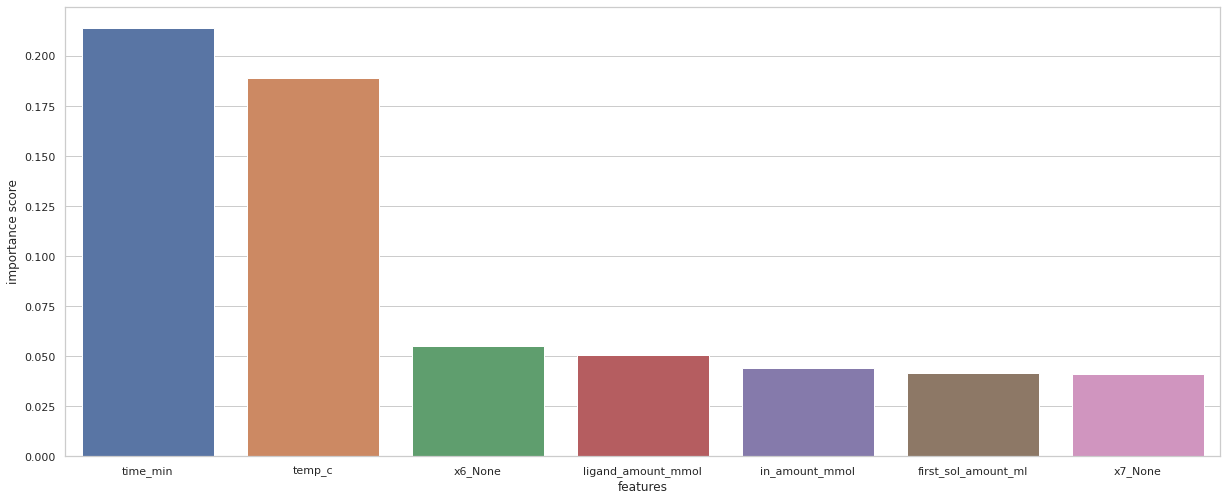

In [31]:
top7_a = DataFrame(sorted_importance_a[0:7], columns=['features', 'importance score'])

others_a = DataFrame(sorted_importance_a[7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_a)

In [32]:
importance_dict_a

{'in_amount_mmol': 0.044028674354178274,
 'p_amount_mmol': 0.016493056756558405,
 'ligand_amount_mmol': 0.05079442540439311,
 'first_sol_amount_ml': 0.04163360172443829,
 'second_sol_amount_ml': 0.007891937620688056,
 'third_sol_amount_ml': 0.00034217135456295544,
 'other_1_amount_mmol': 0.015767751485643737,
 'other_2_amount_mmol': 0.01261585190014275,
 'total_volume_ml': 0.017957944371330428,
 'temp_c': 0.18885559926127757,
 'time_min': 0.21393209196076224,
 'x0_chloroindium oxalate': 0.0,
 'x0_indium acetate': 0.004766515072274292,
 'x0_indium bromide': 3.471893252776809e-05,
 'x0_indium chloride': 0.004693116140414318,
 'x0_indium iodide': 0.00753342440709903,
 'x0_indium myristate': 0.0,
 'x0_indium oxalate': 0.005436904951718763,
 'x0_indium palmitate': 0.0015843844037241109,
 'x0_indium trifluoroacetate': 0.0005243508157537417,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.0011420461611499403,
 'x1_bis(trimethylsilyl)phosphine': 0.00013685991140828792,
 'x1_phosphine gas': 

### Combine


In [33]:
sorted_a = sorted(importance_dict_a.items(), key=lambda x: x[0], reverse=False)
sorted_d = sorted(importance_dict_d.items(), key=lambda x: x[0], reverse=False)
sorted_e = sorted(importance_dict_e.items(), key=lambda x: x[0], reverse=False)


In [34]:
sorted_d 

[('first_sol_amount_ml', 0.010276973964595369),
 ('in_amount_mmol', 0.030831633158011733),
 ('ligand_amount_mmol', 0.022852864821556955),
 ('other_1_amount_mmol', 0.005835850252464728),
 ('other_2_amount_mmol', 0.0005799838623149897),
 ('p_amount_mmol', 0.011253097970357208),
 ('second_sol_amount_ml', 0.01365382296381531),
 ('temp_c', 0.08896870998392434),
 ('third_sol_amount_ml', 0.0),
 ('time_min', 0.07815387843532047),
 ('total_volume_ml', 0.012708901820640705),
 ('x0_chloroindium oxalate', 0.0059908402939203905),
 ('x0_indium acetate', 0.0565774192057567),
 ('x0_indium bromide', 2.1214253913595987e-05),
 ('x0_indium chloride', 0.00641132809130618),
 ('x0_indium iodide', 0.0014325734424605224),
 ('x0_indium myristate', 9.117832714593567e-05),
 ('x0_indium oxalate', 0.01837307878403434),
 ('x0_indium palmitate', 5.468906076706287e-05),
 ('x0_indium trifluoroacetate', 0.21528425744956453),
 ('x0_indium tris(N,N-diisopropylacetamidinato)', 9.125576020383972e-05),
 ('x1_bis(trimethylsil

In [35]:
combined_importance = dict()

In [36]:
for i in range(0,71):
    combined_importance[sorted_e[i][0]] = sorted_e[i][1] + sorted_a[i][1] + sorted_d[i][1]
combined_importance


{'first_sol_amount_ml': 0.07335256052891811,
 'in_amount_mmol': 0.09392302390882398,
 'ligand_amount_mmol': 0.10063129430258455,
 'other_1_amount_mmol': 0.03690121694622891,
 'other_2_amount_mmol': 0.013195835762457739,
 'p_amount_mmol': 0.041401712578302115,
 'second_sol_amount_ml': 0.03567350596194833,
 'temp_c': 0.41595614921513047,
 'third_sol_amount_ml': 0.00034217135456295544,
 'time_min': 0.4272187766706185,
 'total_volume_ml': 0.05420384533202398,
 'x0_chloroindium oxalate': 0.014154689795001318,
 'x0_indium acetate': 0.06686259997798173,
 'x0_indium bromide': 0.001228552668639198,
 'x0_indium chloride': 0.014865676340995344,
 'x0_indium iodide': 0.023089345422329172,
 'x0_indium myristate': 0.00071222949877713,
 'x0_indium oxalate': 0.09036465925782383,
 'x0_indium palmitate': 0.001722100833166576,
 'x0_indium trifluoroacetate': 0.21768152846674094,
 'x0_indium tris(N,N-diisopropylacetamidinato)': 0.00123330192135378,
 'x1_bis(trimethylsilyl)phosphine': 0.00031335623443958844,

In [37]:
sorted_combined_importance = sorted(combined_importance.items(), key=lambda x: x[1], reverse=True)

sorted_combined_importance 

[('time_min', 0.4272187766706185),
 ('temp_c', 0.41595614921513047),
 ('x6_zinc iodide', 0.2703157723970019),
 ('x0_indium trifluoroacetate', 0.21768152846674094),
 ('x6_None', 0.1698429706001501),
 ('ligand_amount_mmol', 0.10063129430258455),
 ('in_amount_mmol', 0.09392302390882398),
 ('x0_indium oxalate', 0.09036465925782383),
 ('x7_None', 0.08037627551878732),
 ('x4_dioctylamine', 0.0736954779639471),
 ('first_sol_amount_ml', 0.07335256052891811),
 ('x0_indium acetate', 0.06686259997798173),
 ('x1_phosphine gas', 0.06456256005196773),
 ('x3_trioctylphosphine', 0.06397048478004218),
 ('x6_zinc oleate', 0.06286431290328187),
 ('total_volume_ml', 0.05420384533202398),
 ('x2_myristic acid', 0.0540439328311529),
 ('x6_zinc chloride', 0.04653368472293808),
 ('p_amount_mmol', 0.041401712578302115),
 ('x4_None', 0.03714379334742632),
 ('other_1_amount_mmol', 0.03690121694622891),
 ('x1_tris(trimethylsilyl)phosphine', 0.03605243812895125),
 ('second_sol_amount_ml', 0.03567350596194833),
 ('x

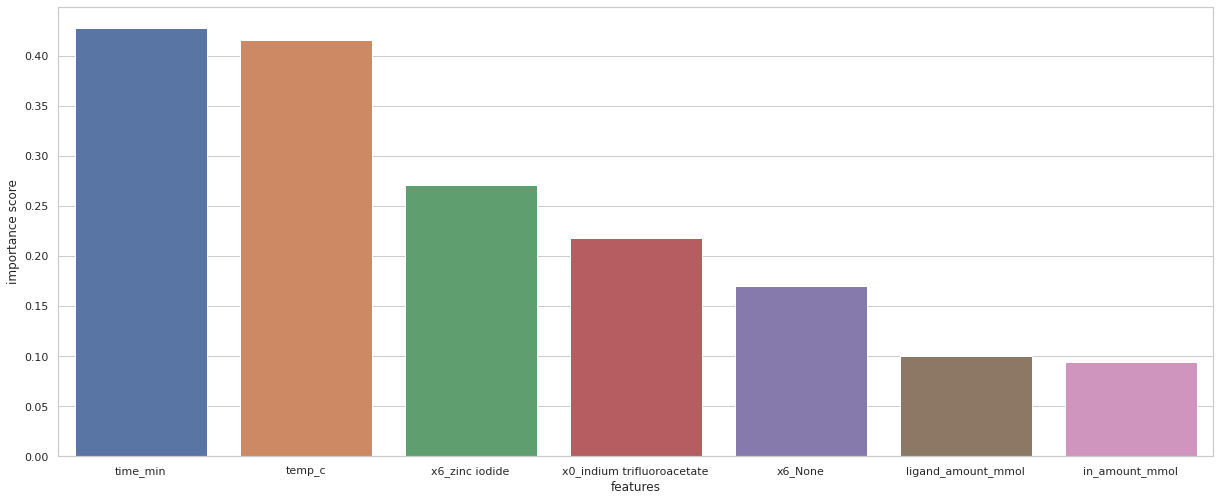

In [38]:
top7_combined = DataFrame(sorted_combined_importance[0:7], columns=['features', 'importance score'])

others_combined = DataFrame(sorted_combined_importance [7:], columns=['features', 'importance score'])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7_combined)